In [0]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
import itertools as it

In [0]:
# Triangular Lower Member function for membership value less than 1(h)
# USED IN "lmf" FUNCTION BELOW
# trilmf(1-D array if the total range, 1-D array of lenght 4 containing [lower, peak , upper, height])

# for example
#  trimlmf(x_temp, [0,20,40, 0.8])
#  x_temp: np.arange(0,101,0.1)

def trilmf(x, abch):
    assert len(abch) == 4 
    a, b, c, h = np.r_[abch]     
    assert a <= b and b <= c

    y = np.zeros(len(x))

    # Left side
    if a != b:
        idx = np.nonzero(np.logical_and(a < x, x < b))[0]
        y[idx] = (x[idx] - a) / float(b - a) * h

    # Right side
    if b != c:
        idx = np.nonzero(np.logical_and(b < x, x < c))[0]
        y[idx] = (c - x[idx]) / float(c - b) * h

    idx = np.nonzero(x == b)
    y[idx] = h
    return y

In [0]:
# Upper Triangular Membership Function 
# umf(1-d array of range, name of the linguistic variable)
# example
# umf(x_temp, 'Temperature')
# x_temp = np.arange(0, 40, 0.1)

def umf(x_var, ling_var):
        
       
        variants_name_list = input("Enter the types of variants of" + " : " + ling_var).split(' ')

        var_variant_umf = []

        print("\n1:triangular membership func\n2:trapaziod membership function")

        for i in range(len(variants_name_list)):
            m = int(input(f"\nEnter the no. corresponding to the type of membership function for UPPER MEMBERSHIP given in above menu for {variants_name_list[i]}: " ))
            print(f"Enter the numbers for {variants_name_list[i]} :" + ling_var)
            varType = [int(x) for x in input().split(' ')]
            if m == 1:
                var_variant_umf.append(fuzz.trimf(x_var, varType))
            elif m == 2:
                var_variant_umf.append(fuzz.trapmf(x_var, varType))
           
        return var_variant_umf, variants_name_list

    

In [0]:
# Lower Membership Function 
# lmf(1-d array of range, list of type of variables, name of the linguistic variable)
#example
# lmf(x_temp, ['low','med','high'], 'Temperature')
# output : var_variant_lmf = [array[<membership values for cold>], array[<membership values for warm>], array[...],...]
# array([1.    , 0.9998, 0.9996, ..., 0.    , 0.    , 0.    ]), array([0.    , 0.0002, 0.0004, ..., 0.    , 0.    , 0.    ]), array([0., 0., 0., ..., 0., 0., 0.])]

def lmf(x_var, variants_name_list, ling_var):
        
       
       
        var_variant_lmf = []

        print("\n1:triangular membership func\n2:trapaziod membership function")

        for i in range(len(variants_name_list)):
            m = int(input(f"\nEnter the no. corresponding to the type of membership function for LOWER MEMBERSHIP given in above menu for {variants_name_list[i]}: " ))
            print(f"Enter the numbers for {variants_name_list[i]} :" + ling_var)
            varType = [float(x) for x in input().split(' ')]
            if m == 1:
                var_variant_lmf.append(trilmf(x_var, varType))
            elif m == 2:
                var_variant_lmf.append(fuzz.trapmf(x_var, varType))
                
        return var_variant_lmf


In [0]:
# Plotting of membership functions
# example
# plotting_mf(x_temp, var_variant_lmf,var_variant_umf, ling_var)
# var_variant_lmf and var_variant_umf are of same type


def plotting_mf(x_var, var_variant_lmf,var_variant_umf, ling_var):
                
    
           
    fig, (ax0) = plt.subplots(figsize=(6, 3))
    ax0.set_title(ling_var)
    #ax0.legend()

    colours = ['r','g', 'y', 'm']
    for i in range(len(var_variant_umf)):
            
        ax0.plot(x_var, var_variant_lmf[i], colours[i] , linewidth = 1.5)
        ax0.plot(x_var, var_variant_umf[i], colours[i] , linewidth = 1.5)


In [0]:
# FUZZIFICATION

# input : 
# x_var = np.arange(0, 40, 0.1)
# var_variant_umf, var_variant_lmf : mentioned above
# 'z': taken from user

# output:
# interp_lst_umf : [<umf of cold at 'z'>, <umf of cold at 'z'> , ....]
# interp_lst_lmf : [<lmf of cold at 'z'>, <lmf of medium at 'z'> , ... ]=[0.0 , 0.5, 0.744]

def interp(x_var,var_variant_umf, var_variant_lmf, ling_var):
    z = int(input("Enter the value of " + ling_var + " to be determined"))
    
    
    interp_lst_umf = []
    interp_lst_lmf = []
    
    for i in range(len(var_variant_umf)):
        x = fuzz.interp_membership(x_var, var_variant_umf[i], z)
        interp_lst_umf.append(x)
    
    
    
    
    for j in range(len(var_variant_lmf)):
        y = fuzz.interp_membership(x_var, var_variant_lmf[j], z)
        interp_lst_lmf.append(y)
    
    
    
    return interp_lst_umf,interp_lst_lmf

In [0]:
# RULE CONCEPTION
# Input : 
# temp_name_list = ['low', 'med', high]
# hum_name_list = ['low', 'med', high]
# fanspeed_name_list = ['low', 'med', high]


# output: 
# l =[1, 2, 3, 2, 2, 3, 3, 2, 3], where 1 :slow, 2: normal, 3: fast, -- > fanspeed

def user_rules(temp_name_list, hum_name_list, fanspeed_name_list):
    
    
    output_combination = [[a, b] for a in temp_name_list 
          for b in hum_name_list] 
    
    
    for i in range(len(fanspeed_name_list)):
        
        print("Enter " + str(i+1) + " for " + fanspeed_name_list[i])
        
        
        l = []
    
    for i in range(len(output_combination)):
          for j in range(2):
                if(j==0):
                    print("Enter the rule for " + output_combination[i][j] + " and " + output_combination[i][j+1])
                    c = int(input("Enter the corresponding value"))
                    l.append(c)

    
        
    
    return l
    
    

In [0]:
# input 
#  temp_interp_umf = [<umf of cold at 'z'>, <umf of cold at 'z'> , ....]    likewise(hum_interp_umf)
#  fan_variant_umf : [array[<membership values for slow>], array[<membership values for normal>], array[...],...]
#  l =[1, 2, 3, 2, 2, 3, 3, 2, 3], where 1 :slow, 2: normal, 3: fast, -- > fanspeed

# output 
# rules_umf : membership values after applying the rules  : list of output umf : [array[output membership for rule cold and low], array[output membership for rule cold and med], array[]...]
# useful_list = fanspeed [[output membership for rule cold and low],[output membership for rule cold and med ],...] : needed for plotting

def uppermf_rules(temp_interp_umf, hum_interp_umf, fanspeed_variant_umf, l):
    
    
    min_value_list_umf =  [[c, d] for c in temp_interp_umf  
          for d in hum_interp_umf ] 
    
      #prints the variants of the output variable , here Fanspeed
    
   
  
    
    
    grading_list_umf = {}

    
    
        
    grading_list_umf = {}
    keys = range(len(fanspeed_variant_umf))
    for i in keys:
        grading_list_umf[i+1] = fanspeed_variant_umf[i]
     
        
    useful_list_umf = []
        
    for i in range(len(l)):
        temp = [l[i], grading_list_umf[l[i]]]
        useful_list_umf.append(temp)

      
    rules_umf = []
    
    
    for i in range(len(min_value_list_umf)):
        for j in range(2):
            if(j==0):
                
                z = np.fmin(min_value_list_umf[i][j],min_value_list_umf[i][j+1])
                rule = np.fmin(z, useful_list_umf[i][1])
                rules_umf.append(rule)
                

                
    return rules_umf, useful_list_umf
                
    
    
                
            

In [0]:
# similar to 'uppermf_rules'

def lowermf_rules( l, fanspeed_name_list , temp_interp_lmf, hum_interp_lmf, fanspeed_variant_lmf):
    
    
    min_value_list_lmf =  [[c, d] for c in temp_interp_lmf  
          for d in hum_interp_lmf ] 
    
  
    grading_list_lmf = {}
    keys = range(len(fanspeed_variant_lmf))
    for i in keys:
        grading_list_lmf[i+1] = fanspeed_variant_lmf[i]
     
        
    useful_list_lmf = []
        
    for i in range(len(l)):
        temp = [l[i], grading_list_lmf[l[i]]]
        useful_list_lmf.append(temp)

      
    rules_lmf = []
    
    
    for i in range(len(min_value_list_lmf)):
        for j in range(2):
            if(j==0):
                
                z = np.fmin(min_value_list_lmf[i][j],min_value_list_lmf[i][j+1])
                rule = np.fmin(z, useful_list_lmf[i][1])
                
                rules_lmf.append(rule)
                

                
    return rules_lmf, useful_list_lmf
                
    


In [0]:
# input
# output_var : range of the fanspeed
# rules_umf, rules_lmf : mentioned above
# useful_list_umf, useful_list_lmf : mentioned above


# To plot output membership (modification needed):
#  lmf, umf overlapping
def output_plot(output_var, rules_umf, rules_lmf, useful_list_umf,useful_list_lmf):
    
    fanspeed0 = np.zeros_like(x_fanspeed)
    
    fig, (ax0) = plt.subplots(figsize=(10, 4))
    
    colours = ['r', 'g','y', 'm', 'c','b','r', 'g','y', 'm', 'c','b']

    
    for i in range(len(rules_umf)):
        
        ax0.fill_between(output_var, fanspeed0, rules_umf[i], facecolor = colours[i], alpha=0.7)
        ax0.plot(output_var, useful_list_umf[i][1], 'k', linewidth=0.5, linestyle='--', )
        ax0.fill_between(output_var, fanspeed0, rules_lmf[i], facecolor = colours[i], alpha=0.7)
        ax0.plot(output_var, useful_list_lmf[i][1], 'k', linewidth=0.5, linestyle='--', )
       
        
    ax0.set_title('Output membership activity')


In [0]:
# aggregation of Upper membership rules and lower membership rules 

# input
# rules_umf, rules_lmf : mentioned above

# output
# max_rule_list_lmf, max_rule_list_umf : an array that stores element wise maximum values of the rules , respectively.
# max_rule_list : an array that stores the aggreagation of max_rule_list_lmf and max_rule_list_umf




def aggregated_rules(rules_umf, rules_lmf):
    
    max_rule_list_umf = []
    for j in range(len(rules_umf[0])):
        max_rule_umf = 0
        for i in range(len(rules_umf)):
            if(rules_umf[i][j]>max_rule_umf):
                max_rule_umf = rules_umf[i][j]
        max_rule_list_umf.append(max_rule_umf)
    max_rule_list_umf = np.asarray(max_rule_list_umf)
        
        
    
    
    max_rule_list_lmf = []
    for k in range(len(rule_lmf[0])):
        max_rule_lmf = 0
        for l in range(len(rules_lmf)):
            if(rules_lmf[l][k]>max_rule_lmf):
                max_rule_lmf = rules_lmf[l][k]
        max_rule_list_lmf.append(max_rule_lmf)
    max_rule_list_lmf = np.asarray(max_rule_list_lmf)

    
    max_rule_list = (max_rule_list_umf - max_rule_list_lmf)
    
    
    return max_rule_list, max_rule_list_lmf, max_rule_list_umf

In [0]:
# Defuzzification function converts the fuzzy values to crisp values through determination of centroid

# input
# x_fanspeed : range of the output variable (syntax mentioned above)
# max_rule_list  : mentioned above

# output 
# defuz : gives the centroid of the aggregated region 
# example : 
# defuz = fuzz.defuzz(x_fanspeed, max_rule_list, 'centroid')
# where x_fanspeed is the range of output
# max_rule_list is aggregation of lower membership values and upper membership values
# 'centroid'  will determine the centroid of the aggregated region
    


def  defuzzification(x_fanspeed, max_rule_list ):
    defuz = fuzz.defuzz(x_fanspeed, max_rule_list, 'centroid')
    
    return defuz


In [0]:
# Plots the centroid

# input 
# output_var : mentioned above
# defuz : mentioned above
# max_rule_list : mentioned above
# var_variant_lmf : mentioned above
# var_variant_umf : mentioned above
# max_rule_list_umf : mentioned above
# max_rule_list_lmf : mentioned above


def centroid_plot(output_var, defuz, max_rule_list, var_variant_lmf, var_variant_umf, max_rule_list_umf, max_rule_list_lmf):
    
    output_activation = fuzz.interp_membership(output_var, max_rule_list, defuz)  # for plot
    
    fig, ax0 = plt.subplots(figsize=(8, 3))
    
    for i in range(len(var_variant_umf)):
        
        ax0.plot(output_var, var_variant_umf[i], 'b', linewidth=0.5, linestyle='--', )
        ax0.plot(output_var, var_variant_lmf[i], 'g', linewidth=0.5, linestyle='--', )
        
        ax0.fill_between(output_var, max_rule_list_umf, max_rule_list_lmf, facecolor='Orange', alpha=0.7)
        ax0.plot([defuz, defuz], [0, output_activation], 'k', linewidth=1.5, alpha=0.9)
        
        
    ax0.set_title('Aggregated membership and result (line)')

   

# MAIN FUNCTION

In [0]:

ling_var1 = input("Enter the Linguistic Variable for input")
x,y,z = [float(x) for x in input("Enter the upper, lower and increment for the Variable:").split(' ')]
x_temp = np.arange(x, y, z)


ling_var2 = input("Enter the Linguistic Variable for input")
x,y,z = [float(x) for x in input("Enter the upper, lower and increment for the Variable:").split(' ')]
x_hum = np.arange(x, y, z)


ling_var3 = input("Enter the Linguistic Variable for output")
x,y,z = [float(x) for x in input("Enter the upper, lower and increment for the Variable:").split(' ')]
x_fanspeed = np.arange(x, y, z)


Enter the Linguistic Variable for inputTEMPERATURE
Enter the upper, lower and increment for the Variable:0 101 0.01
Enter the Linguistic Variable for inputHUMIDITY
Enter the upper, lower and increment for the Variable:0 51 0.005
Enter the Linguistic Variable for outputFANSPEED
Enter the upper, lower and increment for the Variable:0 11 0.001


In [0]:
temp_variant_umf, temp_name_list = umf(x_temp, ling_var1)
temp_variant_lmf = lmf(x_temp, temp_name_list, ling_var1)




Enter the types of variants of : TEMPERATURECOLD WARM HOT

1:triangular membership func
2:trapaziod membership function

Enter the no. corresponding to the type of membership function for UPPER MEMBERSHIP given in above menu for COLD: 1
Enter the numbers for COLD :TEMPERATURE
0 0 50

Enter the no. corresponding to the type of membership function for UPPER MEMBERSHIP given in above menu for WARM: 1
Enter the numbers for WARM :TEMPERATURE
20 50 70

Enter the no. corresponding to the type of membership function for UPPER MEMBERSHIP given in above menu for HOT: 1
Enter the numbers for HOT :TEMPERATURE
50 100 100

1:triangular membership func
2:trapaziod membership function

Enter the no. corresponding to the type of membership function for LOWER MEMBERSHIP given in above menu for COLD: 1
Enter the numbers for COLD :TEMPERATURE
0 0 47 0.8

Enter the no. corresponding to the type of membership function for LOWER MEMBERSHIP given in above menu for WARM: 1
Enter the numbers for WARM :TEMPERATU

In [0]:
hum_variant_umf, hum_name_list = umf(x_hum, ling_var2)
hum_variant_lmf = lmf(x_hum, hum_name_list, ling_var2)

Enter the types of variants of : HUMIDITYLOW MEDIUM HIGH

1:triangular membership func
2:trapaziod membership function

Enter the no. corresponding to the type of membership function for UPPER MEMBERSHIP given in above menu for LOW: 1
Enter the numbers for LOW :HUMIDITY
0 0 25

Enter the no. corresponding to the type of membership function for UPPER MEMBERSHIP given in above menu for MEDIUM: 1
Enter the numbers for MEDIUM :HUMIDITY
15 25 35

Enter the no. corresponding to the type of membership function for UPPER MEMBERSHIP given in above menu for HIGH: 1
Enter the numbers for HIGH :HUMIDITY
25 50 50

1:triangular membership func
2:trapaziod membership function

Enter the no. corresponding to the type of membership function for LOWER MEMBERSHIP given in above menu for LOW: 1
Enter the numbers for LOW :HUMIDITY
0 0 22 0.8

Enter the no. corresponding to the type of membership function for LOWER MEMBERSHIP given in above menu for MEDIUM: 1
Enter the numbers for MEDIUM :HUMIDITY
18 25 32 

In [0]:
fanspeed_variant_umf, fanspeed_name_list = umf(x_fanspeed, ling_var3)
fanspeed_variant_lmf = lmf(x_fanspeed, fanspeed_name_list, ling_var3)

Enter the types of variants of : FANSPEEDSLOW NORMAL FAST

1:triangular membership func
2:trapaziod membership function

Enter the no. corresponding to the type of membership function for UPPER MEMBERSHIP given in above menu for SLOW: 1
Enter the numbers for SLOW :FANSPEED
0 0 5

Enter the no. corresponding to the type of membership function for UPPER MEMBERSHIP given in above menu for NORMAL: 1
Enter the numbers for NORMAL :FANSPEED
0 5 10

Enter the no. corresponding to the type of membership function for UPPER MEMBERSHIP given in above menu for FAST: 1
Enter the numbers for FAST :FANSPEED
5 10 10

1:triangular membership func
2:trapaziod membership function

Enter the no. corresponding to the type of membership function for LOWER MEMBERSHIP given in above menu for SLOW: 1
Enter the numbers for SLOW :FANSPEED
0 0 4 0.8

Enter the no. corresponding to the type of membership function for LOWER MEMBERSHIP given in above menu for NORMAL: 1
Enter the numbers for NORMAL :FANSPEED
1 5 9 0.8

In [0]:
print(fanspeed_variant_umf)

[array([1.    , 0.9998, 0.9996, ..., 0.    , 0.    , 0.    ]), array([0.    , 0.0002, 0.0004, ..., 0.    , 0.    , 0.    ]), array([0., 0., 0., ..., 0., 0., 0.])]


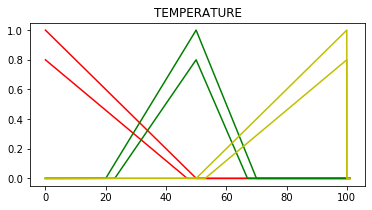

In [0]:
# ling_var1 = input("Enter the Variable")
plotting_mf(x_temp, temp_variant_lmf,temp_variant_umf, ling_var1)
 

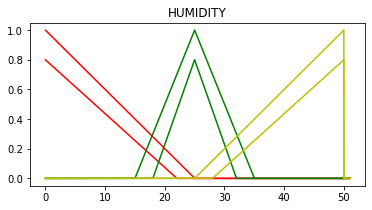

In [0]:
# ling_var2 = input("Enter the Variable")
plotting_mf(x_hum, hum_variant_lmf,hum_variant_umf, ling_var2)
    
    

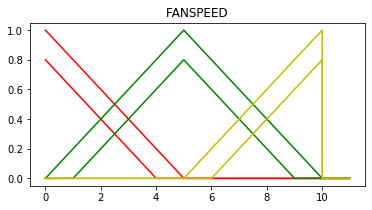

In [0]:
# ling_var3 = input("Enter the Variable")
plotting_mf(x_fanspeed, fanspeed_variant_lmf, fanspeed_variant_umf, ling_var3)
   

In [0]:
l = user_rules(temp_name_list, hum_name_list, fanspeed_name_list)

Enter 1 for SLOW
Enter 2 for NORMAL
Enter 3 for FAST
Enter the rule for COLD and LOW
Enter the corresponding value1
Enter the rule for COLD and MEDIUM
Enter the corresponding value2
Enter the rule for COLD and HIGH
Enter the corresponding value3
Enter the rule for WARM and LOW
Enter the corresponding value2
Enter the rule for WARM and MEDIUM
Enter the corresponding value2
Enter the rule for WARM and HIGH
Enter the corresponding value3
Enter the rule for HOT and LOW
Enter the corresponding value3
Enter the rule for HOT and MEDIUM
Enter the corresponding value2
Enter the rule for HOT and HIGH
Enter the corresponding value3


In [0]:
print(l)

[1, 2, 3, 2, 2, 3, 3, 2, 3]


In [0]:
temp_interp_umf,temp_interp_lmf = interp(x_temp,temp_variant_umf,temp_variant_lmf,ling_var1)


Enter the value of TEMPERATURE to be determined33


In [0]:
print(temp_interp_umf,temp_interp_lmf)

[0.34, 0.43333333333333335, 0.0] [0.23829787234042554, 0.2962962962962963, 0.0]


In [0]:
hum_interp_umf,hum_interp_lmf = interp(x_hum,hum_variant_umf, hum_variant_lmf, ling_var2)



Enter the value of HUMIDITY to be determined34


In [0]:
print(hum_interp_umf,hum_interp_lmf)

[0.0, 0.1, 0.36] [0.0, 0.0, 0.21818181818181817]


In [0]:
rule_umf, useful_list_umf = uppermf_rules(temp_interp_umf, hum_interp_umf, fanspeed_variant_umf, l)

In [0]:
rule_umf

[array([0., 0., 0., ..., 0., 0., 0.]),
 array([0.    , 0.0002, 0.0004, ..., 0.    , 0.    , 0.    ]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0.    , 0.0002, 0.0004, ..., 0.    , 0.    , 0.    ]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.])]

In [0]:
useful_list_umf

[[1, array([1.    , 0.9998, 0.9996, ..., 0.    , 0.    , 0.    ])],
 [2, array([0.    , 0.0002, 0.0004, ..., 0.    , 0.    , 0.    ])],
 [3, array([0., 0., 0., ..., 0., 0., 0.])],
 [2, array([0.    , 0.0002, 0.0004, ..., 0.    , 0.    , 0.    ])],
 [2, array([0.    , 0.0002, 0.0004, ..., 0.    , 0.    , 0.    ])],
 [3, array([0., 0., 0., ..., 0., 0., 0.])],
 [3, array([0., 0., 0., ..., 0., 0., 0.])],
 [2, array([0.    , 0.0002, 0.0004, ..., 0.    , 0.    , 0.    ])],
 [3, array([0., 0., 0., ..., 0., 0., 0.])]]

In [0]:
rule_lmf, useful_list_lmf = lowermf_rules(l, fanspeed_name_list , temp_interp_lmf, hum_interp_lmf, fanspeed_variant_lmf)

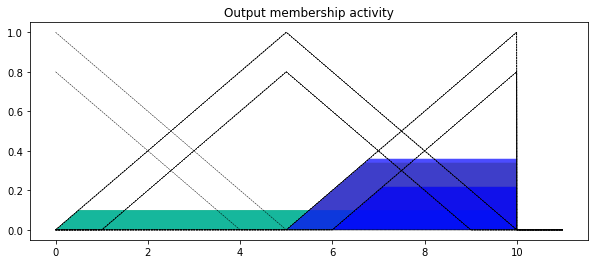

In [0]:
output_plot(x_fanspeed, rule_umf, rule_lmf, useful_list_umf, useful_list_lmf)
 

In [0]:
max_rule_list, max_rule_lmf, max_rule_umf = aggregated_rules(rule_umf,rule_lmf)

In [0]:
max_rule_umf

array([0.    , 0.0002, 0.0004, ..., 0.    , 0.    , 0.    ])

In [0]:
max_rule_lmf

array([0., 0., 0., ..., 0., 0., 0.])

In [0]:
defuz = defuzzification(x_fanspeed, max_rule_list )
print(defuz)

5.593165323168703


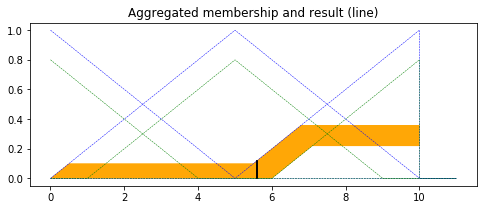

In [0]:
centroid_plot(x_fanspeed, defuz, max_rule_list, fanspeed_variant_lmf, fanspeed_variant_umf, max_rule_umf, max_rule_lmf)